In [3]:
import numpy as np 
from scipy import stats 
import matplotlib.pyplot as plt 
import matplotlib.font_manager 
from pyod.models.knn import KNN 
from pyod.utils.data import generate_data, get_outliers_inliers 


In [4]:
# generating a random dataset with two features 
X_train, y_train = generate_data(n_train = 300, train_only = True, 
												n_features = 2) 

# Setting the percentage of outliers 
outlier_fraction = 0.1

# Storing the outliers and inliners in different numpy arrays 
X_outliers, X_inliers = get_outliers_inliers(X_train, y_train) 
n_inliers = len(X_inliers) 
n_outliers = len(X_outliers) 

# Separating the two features 
f1 = X_train[:, [0]].reshape(-1, 1) 
f2 = X_train[:, [1]].reshape(-1, 1) 


Text(0, 0.5, 'Feature 2')

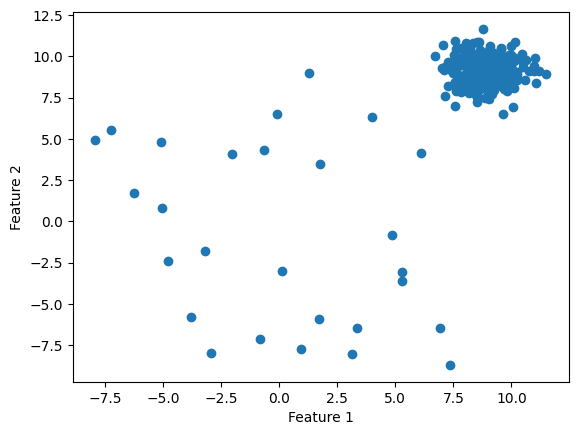

In [5]:
# Visualising the dataset 
# create a meshgrid 
xx, yy = np.meshgrid(np.linspace(-10, 10, 200), 
					np.linspace(-10, 10, 200)) 

# scatter plot 
plt.scatter(f1, f2) 
plt.xlabel('Feature 1') 
plt.ylabel('Feature 2') 


In [6]:
# Training the classifier 
clf = KNN(contamination = outlier_fraction) 
clf.fit(X_train, y_train) 

# You can print this to see all the prediction scores 
scores_pred = clf.decision_function(X_train)*-1

y_pred = clf.predict(X_train) 
n_errors = (y_pred != y_train).sum() 
# Counting the number of errors 

print('The number of prediction errors are ' + str(n_errors)) 


The number of prediction errors are 6


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pyod\models\base.py:554: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


C:\Users\User\AppData\Local\Temp\ipykernel_21788\1057192670.py:34: UserWarning: Legend does not support handles for QuadContourSet instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  subplot.legend(


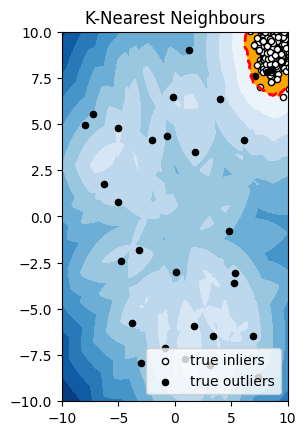

In [8]:
# threshold value to consider a 
# datapoint inlier or outlier 
threshold = stats.scoreatpercentile(scores_pred, 100 * outlier_fraction) 

# decision function calculates the raw 
# anomaly score for every point 
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
Z = Z.reshape(xx.shape) 

# fill blue colormap from minimum anomaly 
# score to threshold value 
subplot = plt.subplot(1, 2, 1) 
subplot.contourf(xx, yy, Z, levels = np.linspace(Z.min(), 
				threshold, 10), cmap = plt.cm.Blues_r) 

# draw red contour line where anomaly 
# score is equal to threshold 
a = subplot.contour(xx, yy, Z, levels =[threshold], 
					linewidths = 2, colors ='red') 

# fill orange contour lines where range of anomaly 
# score is from threshold to maximum anomaly score 
subplot.contourf(xx, yy, Z, levels =[threshold, Z.max()], colors ='orange') 

# scatter plot of inliers with white dots 
b = subplot.scatter(X_train[:-n_outliers, 0], X_train[:-n_outliers, 1], 
									c ='white', s = 20, edgecolor ='k') 

# scatter plot of outliers with black dots 
c = subplot.scatter(X_train[-n_outliers:, 0], X_train[-n_outliers:, 1], 
									c ='black', s = 20, edgecolor ='k') 
subplot.axis('tight') 

subplot.legend( 
	[a, b, c], 
	['learned decision function', 'true inliers', 'true outliers'], 
	prop = matplotlib.font_manager.FontProperties(size = 10), 
	loc ='lower right') 

subplot.set_title('K-Nearest Neighbours') 
subplot.set_xlim((-10, 10)) 
subplot.set_ylim((-10, 10)) 
plt.show() 
